# Classification Project - Ivaylo Ivanov


Regression outputs a continuous value while classification outputs one of several pre-defined classes. In the most simple way, the classes are only two. For example, if we want to detect whether there's a cat on an image, we can have two classes: "cat" and "non-cat".

Explore the problem of classification. Implement and document one algorithm. Apply it to some real-world data. You can use the following checklist:

Note: If your paper is about the algorithm, consider writing it from scratch, not reusing it from a library.

1. What is supervised learning? What do supervised learning models do?
2. What is regression? What is classification?
3. What types of problems does classification solve directly?
4. What types of problems can be reduced to classification?
5. What's the difference between two-class and multi-class classification?
6. Explore one algorithm for classification, e.g. logistic regression.
7. State the problem clearly
8. List all sssumptions of the modelling function
9. Describe the process: distances, error function, total loss, gradient descent, etc.; as needed
10. Implement the algorithm from scratch
11. Select or generate a small dataset, suitable for classification. Run your algorithm as a sanity check
12. Debug and solve any problems
13. Waht is a confusion matrix?
14. What metrics are used to score a classifier?
15. Accuracy, Precision, Recall, others
16. ROC curve, interpretation
17. Select a real dataset
18. Explore it to get acquainted with what information it contains
19. Clean up the data if you need to do so
20. Perform classification
21. Score your classification model
22. Use your classifier to predict
23. Split the data into training and testing set
24. Optionally, perform cross-validation
25. Compare your implementation to another one, e.g. scikit-learn. They should give the same (or very similar) results
26. Communicate the results on your dataset
27. Optionally, publish your model on the Internet as a Web API

# Models

Supervised learning algorithms rely on some predefined labeling of data, which is used for the discovery of patterns. By contrast, unsupervised learning is a family of algorithms, which do not rely on labeling of data - the algorithm itself discovers the labeling. 

With regard to classification vs regression, regression tries to predict the value for a certain variable, whereas classification tries to predict the category which the observation would fall into. In some cases, it is more difficult to draw a line between classification and regression, as classification just involves regression with a threshold, which is used to delineate between the categories.

The problems which classification can solve directly are linked to the need to distinguish between classes directly - for example, the famous Titanic competition on Kaggle, which aims for participants to predict whether passengers would survive based on a number of characteristics - passenger class, gender, age, etc. By contrast, there are other problems, which can be reduced to classification - for example, email spam filters, which rely on classification of emails into "spam" vs "ham".  

# Binary vs Multi-class classification

Binary, or two-class classification, involves classification and prediction involving only 2 categories - for example, we can classify if the predicted value is 0 or 1 (as in Logistic Regression). Usually, the 0 vs 1 is encoding for an underlying variable. Multi-class classification involves classifying an observation into 1 of multiple classes - an example of such problems is face recognition - we have (much) more than 2 categories, or classes to classify a person.



# K-Nearest Neighbours (KNN) in detail

One of the machine-learning algorithms which can be used for classification is K-Nearest Neighbours. K-Nearest Neighbours assumes that points that are of the same category, or classification, tend to cluster together. A simple representation of KNN is below - the plane is 2-dimensional, but the principle can still be illustrated with this:

![Alt text](https://upload.wikimedia.org/wikipedia/commons/e/e9/Map1NNReducedDataSet.png) 

Source: https://commons.wikimedia.org/wiki/File:Map1NNReducedDataSet.png (Wikipedia)

In general, KNN classifies points based on their distance to the chosen K points. There are several ways to calculate the distance - Euclidean distance, Minkowski distance, Manhattan distance, etc. The most popular distance method is Euclidean distance. Based on the Pythagorean formula, the straight-line distance (c) between points A and B is the square root of the sum of the sides (a and b) of a right-angled triangle:

$$ c = \sqrt{a^{2} + b^{2}} $$

This can be represented as: $$ \sqrt{(B_x - A_x)^{2} + (B_y - A_y)^2} $$ 

or in the general n-dimension case, this could be represented as: 

$$ \sqrt{\sum_{i=1}^n(B_i - A_i)^{2}} $$

The output of the KNN prediction would be the mode of the labels, or classes, of the K nearest neighbours to any new datapoint. We can also use KNN for regression problems as well, and then the value of the regression prediction for a new datapoint would be an mean of the values of the k-nearest neighbors.

# Algorithm implementation

The way the algorithm would be implemented would be as follows - first, we would need to choose the number of K. We would have the algorithm calculate the distance between the new point in the data and the K neighbors. The distances between the new point and all known points are tallied up in ascending order from shortest to longest, and the shortest K distances are selected (to correspond to the K nearest neighbours). For a classification problem, we need to return the mode of the K labels.

# Algorithm test

In this stage, I will generate some fake numbers, and try to check the algorithm. We need to import KNeighborsClassifier as a first step.

In [110]:
from sklearn.neighbors import KNeighborsClassifier

In [111]:
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
new_values = [[0.3],[18]]

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X, y)
predictions = model.predict(new_values)

# this is to get the probability of a 1
predict_probability_1 = model.predict_proba(new_values)[:,1]

print(predictions)
print(predict_probability_1)

[0 1]
[0.33333333 0.66666667]


It seems like the model makes intuitive sense - it predicts 1 for a very high input value (18), and it predicts a 0 for a low input value (0).

# Scoring how well the algorithm predicts

We also need to take into account how well the algorithm predicts real data. The way to do that is with the help of several metrics, at least some of which map to the confusion matrix, which will be discussed first. 

- Confusion matrix

The confusion matrix tells us what we predicted vs what really happened, and it features the following 4 quadrants:

|            | Predicted No   | Predicted Yes  |
|------------|----------------|----------------|
| Actual No  | True Negative  | False Positive |
| Actual Yes | False Negative | True Positive  |

There are 4 metrics to be obtained from this - accuracy, precision, recall and F1.

- Accuracy

The definition of Accuracy is:

$$ Accuracy=\frac{true.positives+true.negatives}{true.positives+true.negatives+false.positives+false.negatives} $$

The drawback of Accuracy is that in datasets, which are skewed towards 1 category, Accuracy will favor predictions which predict the dominant value. If we look at this from a minority perspective, not predicting a value from a minor category would mean that we are seriously off in predictions of that segment.

- Precision

The definition of Precision is:

$$ Precision =\frac{true.positives}{true.positives+false.positives} $$ 

- Recall

The definition of Recall is:

$$ Recall = \frac{true.positives}{true.positives+false.negatives} $$

Precision vs Recall represents a tradeoff, and the metric to choose depends on the use case. For example, in diagnosing life-threatening diseases, we are interested in minimizing the false negatives (cases where we predict that the patient does not have the disease, but he/she does). 

However, this is not black and white - this has to be put in the context of what the treatment is - if the treatment itself is difficult for the patient, we also need to take into account the rate of false positives as well.

- F1

The definition of F1 is:

$$ F1 = \frac{2*Precision*Recall}{Precision + Recall} $$

In situations where both precision and recall are important, we can take both into account by using F1.

- ROC curve

The ROC curve is another metric to check the predictions of our model. It is a plot of the True Positive Rate vs the False Positive Rate calculated at different thresholds. The model performance is determined by looking at the area under the ROC curve.

# Real dataset

In terms of a real dataset, I took the one from Kaggle - the one about classifying mushrooms: https://www.kaggle.com/datasets/uciml/mushroom-classification. The goal of this analysis would be to predict whether a mushroom is edible or poisonous.

First, we need to read the data. I will put all my imports up on top.

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression

In [113]:
data = pd.read_csv('/Users/ivaylo.ivanov/Downloads/mushrooms.csv')
print(data.head())

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

Some attribute information, copied from the file, is here:

- **class: edible=e, poisonous=p (this is the variable to be explained)**
- cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
- cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
- cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
- bruises: bruises=t,no=f
- odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
- gill-attachment: attached=a,descending=d,free=f,notched=n
- gill-spacing: close=c,crowded=w,distant=d
- gill-size: broad=b,narrow=n
- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
- stalk-shape: enlarging=e,tapering=t
- stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
- stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- veil-type: partial=p,universal=u
- veil-color: brown=n,orange=o,white=w,yellow=y
- ring-number: none=n,one=o,two=t
- ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
- spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
- population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
- habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

Exploring the dataset further:

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [115]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


It seems like we have 23 columns in the dataset, and 8,124 observations. 

First, we need to transform the target column of the dataset - class - into containing 0 and 1s. We will encode edible/e as 0 and poisonous/p as 1.

In [116]:
data['class'] = data['class'].str.replace("e","0").str.replace("p","1").astype('int')
print(data.head())
data.info()

   class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0      1         x           s         n       t    p               f   
1      0         x           s         y       t    a               f   
2      0         b           s         w       t    l               f   
3      1         x           y         w       t    p               f   
4      0         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1 

We can see that all of the variables, including the target variables, are categorical values. We cannot work with these directly, and we should not directly transform each of the categories into numbers, as this would imply some relationship between these - for example, if we encode grasses=g as 0, leaves=l as 1, etc, this would imply that leaves are more than grasses, which does not make sense. This is why these would need to be represented with dummy variables.

In [117]:
# need to transform all variables to dummies, except class

column_names = data.columns.values.tolist()
print(column_names)

print('\n')

column_names_except_class = column_names[1:]
print(column_names_except_class)

['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


In [118]:
data_dummies = pd.get_dummies(data, columns = column_names_except_class, drop_first=True)

print(data.head())
print('\n')
print(data_dummies.head())

   class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0      1         x           s         n       t    p               f   
1      0         x           s         y       t    a               f   
2      0         b           s         w       t    l               f   
3      1         x           y         w       t    p               f   
4      0         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1 

In [119]:
data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 96 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   class                       8124 non-null   int64
 1   cap-shape_c                 8124 non-null   uint8
 2   cap-shape_f                 8124 non-null   uint8
 3   cap-shape_k                 8124 non-null   uint8
 4   cap-shape_s                 8124 non-null   uint8
 5   cap-shape_x                 8124 non-null   uint8
 6   cap-surface_g               8124 non-null   uint8
 7   cap-surface_s               8124 non-null   uint8
 8   cap-surface_y               8124 non-null   uint8
 9   cap-color_c                 8124 non-null   uint8
 10  cap-color_e                 8124 non-null   uint8
 11  cap-color_g                 8124 non-null   uint8
 12  cap-color_n                 8124 non-null   uint8
 13  cap-color_p                 8124 non-null   uint8
 14  cap-colo

As a next step, we need to find the variables with highest correlations (positive or negative) with class, so that we can narrow down the variables for the KNeighborsClassifier. In order to do that, I need to build the correlation matrix:

In [120]:
corr_matrix = data_dummies.corr()
print(corr_matrix)

                class  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
class        1.000000     0.023007     0.018526     0.163565    -0.060664   
cap-shape_c  0.023007     1.000000    -0.017672    -0.007477    -0.001396   
cap-shape_f  0.018526    -0.017672     1.000000    -0.268226    -0.050070   
cap-shape_k  0.163565    -0.007477    -0.268226     1.000000    -0.021185   
cap-shape_s -0.060664    -0.001396    -0.050070    -0.021185     1.000000   
...               ...          ...          ...          ...          ...   
habitat_l    0.155150     0.065707    -0.052326     0.235108    -0.021242   
habitat_m   -0.138627    -0.004286    -0.129312    -0.065047    -0.012142   
habitat_p    0.323346    -0.008985     0.021891     0.090538    -0.025458   
habitat_u    0.112078    -0.004835     0.030636    -0.073380     0.288697   
habitat_w   -0.150087    -0.003453    -0.017450     0.119003    -0.009784   

             cap-shape_x  cap-surface_g  cap-surface_s  cap-surface_y  \
cl

and visualize it with Seaborn:

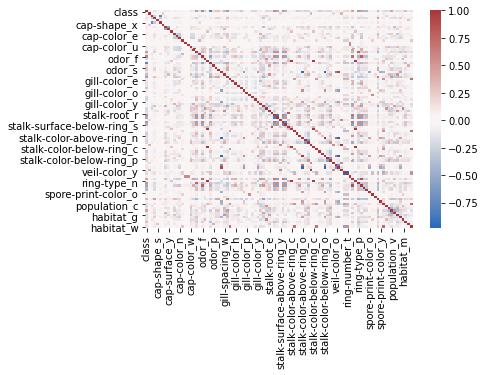

In [121]:
sns.heatmap(corr_matrix, cmap='vlag')
plt.show()

There are a lot of correlations - we would need to show only some of them - I have chosen an arbitrary threshold of 0.5 (we will get the correlations higher than 0.5 and lower than -0.5.

In [122]:
corr_threshold = 0.3

corr_matrix_new = corr_matrix.unstack()
higher_corr = corr_matrix_new[abs(corr_matrix_new) >= corr_threshold]

# ordering the correlations from highest to lowest:

print(higher_corr['class'].sort_values(ascending=False))

class                         1.000000
odor_f                        0.623842
stalk-surface-above-ring_k    0.587658
stalk-surface-below-ring_k    0.573524
gill-size_n                   0.540024
spore-print-color_h           0.490229
ring-type_l                   0.451619
population_v                  0.443722
spore-print-color_w           0.357384
habitat_p                     0.323346
gill-spacing_w               -0.348387
spore-print-color_k          -0.396832
spore-print-color_n          -0.416645
stalk-surface-below-ring_s   -0.425444
stalk-surface-above-ring_s   -0.491314
bruises_t                    -0.501530
ring-type_p                  -0.540469
odor_n                       -0.785557
dtype: float64


Referring again to the dictionary, it seems like the probability of a mushroom being poisonous is positively correlated to the following features:

- odor_f: foul=f
- stalk-surface-above-ring_k: silky=k
- stalk-surface-below-ring_k: silky=k
- gill-size_n: narrow=n
- spore-print-color_h: chocolate=h
- ring-type_l: large=l
- population_v: several=v
- spore-print-color_w: white=w
- habitat_p: paths=p

and negatively correlated to the following features:

- gill-spacing_w: crowded=w
- spore-print-color_k: black=k
- spore-print-color_n: brown=n
- stalk-surface-below-ring_s: smooth=s
- stalk-surface-above-ring_s: smooth=s
- bruises_t: bruises=t
- ring-type_p: pendant=p
- odor_n: none=n

In [123]:
# identifying the best columns, except class, and putting these into a list

best_columns = higher_corr['class'].sort_values(ascending=False).index.tolist()
print(best_columns)

['class', 'odor_f', 'stalk-surface-above-ring_k', 'stalk-surface-below-ring_k', 'gill-size_n', 'spore-print-color_h', 'ring-type_l', 'population_v', 'spore-print-color_w', 'habitat_p', 'gill-spacing_w', 'spore-print-color_k', 'spore-print-color_n', 'stalk-surface-below-ring_s', 'stalk-surface-above-ring_s', 'bruises_t', 'ring-type_p', 'odor_n']


We need to only select the columns above from data_dummies:

In [124]:
subset_data = data_dummies.loc[:,best_columns]
print(subset_data.head())
print('\n')
subset_data.info()

   class  odor_f  stalk-surface-above-ring_k  stalk-surface-below-ring_k  \
0      1       0                           0                           0   
1      0       0                           0                           0   
2      0       0                           0                           0   
3      1       0                           0                           0   
4      0       0                           0                           0   

   gill-size_n  spore-print-color_h  ring-type_l  population_v  \
0            1                    0            0             0   
1            0                    0            0             0   
2            0                    0            0             0   
3            1                    0            0             0   
4            0                    0            0             0   

   spore-print-color_w  habitat_p  gill-spacing_w  spore-print-color_k  \
0                    0          0               0                    1  

In [125]:
# random_state = 1 should be set so that results are reproducible

train, test = train_test_split(subset_data, test_size=0.2, random_state=1)

# dividing these into X (target variable - class) and Y (explanatory variables - all except class)

train_Y = train['class']
train_X = train.loc[:, train.columns != 'class']
test_Y = test['class']
test_X = test.loc[:, test.columns != 'class']

# Fitting a KNeighborsClassifier model

In [126]:
# fitting the model

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_X, train_Y)

# predictions

predictions = knn.predict(test_X)

# this is to get the probability of a 1
predict_probability_1 = knn.predict_proba(test_X)[:,1]

As a next step, we need to score the model: 

In [127]:
# Accuracy score

acc_score = accuracy_score(test_Y, predictions)
print("The KNN accuracy score is:", acc_score)

# Confusion matrix

conf_matr = confusion_matrix(test_Y, predictions)
print("The KNN confusion matrix looks as follows:", '\n', conf_matr)

# Precision

pr_score = precision_score(test_Y, predictions)
print("The KNN precision score is:", pr_score)

# Recall

rec_score = recall_score(test_Y, predictions)
print("The KNN recall score is:", rec_score)

The KNN accuracy score is: 1.0
The KNN confusion matrix looks as follows: 
 [[820   0]
 [  0 805]]
The KNN precision score is: 1.0
The KNN recall score is: 1.0


# Interpretation

The dataset is quite small, which is why the results of the test are 100% accuracy, recall and precision.

# Comparison with Logistic Regression

If I compare the KNN results against the results of a logistic regression, the results from the logistic regression are as follows:

In [128]:
# fitting the model

lr = LogisticRegression()
lr.fit(train_X, train_Y)

# predictions

lr_predictions = lr.predict(test_X)

In [129]:
# As a next step, we need to score the model:

# Accuracy

lr_acc_score = accuracy_score(test_Y, lr_predictions)
print("The LR accuracy score is:", lr_acc_score)

# Confusion matrix

lr_conf_matr = confusion_matrix(test_Y, lr_predictions)
print("The LR confusion matrix looks as follows:", '\n', lr_conf_matr)

# Precision

lr_pr_score = precision_score(test_Y, lr_predictions)
print("The LR precision score is:", lr_pr_score)

# Recall

lr_rec_score = recall_score(test_Y, lr_predictions)
print("The LR recall score is:", lr_rec_score)

The LR accuracy score is: 0.9723076923076923
The LR confusion matrix looks as follows: 
 [[816   4]
 [ 41 764]]
The LR precision score is: 0.9947916666666666
The LR recall score is: 0.9490683229813665


Here, results are still quite high, although slightly lower than the KNN ones.